In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://data.cityofchicago.org/resource/gumc-mgzr.csv')

In [3]:
data.head()

,case_number,date,block,victimization_primary,incident_primary,gunshot_injury_i,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,victimization_fbi_cd,incident_fbi_cd,victimization_fbi_descr,incident_fbi_descr,victimization_iucr_cd,incident_iucr_cd,victimization_iucr_secondary,incident_iucr_secondary,homicide_victim_first_name,homicide_victim_mi,homicide_victim_last_name,month,day_of_week,hour,location_description,state_house_district,state_senate_district,updated,latitude,longitude,location
0,JF145775,2022-02-15T22:52:00.000,NaN,NON-FATAL,NON-FATAL,YES,SHOOT-JF145775-#1,NaN,NaN,NaN,None,NaN,NaN,NaN,UNKNOWN,M,WWH,NaN,NaN,NaN,NaN,UNK,UNK,NaN,NaN,NaN,NaN,NaN,2,3,22,(NOT PROVIDED),NaN,NaN,NaN,NaN,NaN,NaN
1,JF145625,2022-02-15T18:56:00.000,2200 W DIVISION ST,BATTERY,BATTERY,YES,SHOOT-JF145625-#1,60622.0,2.0,WEST TOWN,None,3.0,12.0,1212.0,20-29,M,BLK,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN,2,3,18,HOSPITAL BUILDING / GROUNDS,4.0,2.0,2022-02-15T23:03:03.000,41.902361,-87.683540,POINT (-87.68354 41.9023605)
2,JF145393,2022-02-15T16:11:00.000,8000 S ST LOUIS AVE,BATTERY,BATTERY,YES,SHOOT-JF145393-#1,60652.0,18.0,ASHBURN,None,1.0,8.0,834.0,0-19,M,BLK,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN,2,3,16,STREET,32.0,16.0,2022-02-15T21:14:03.000,41.747582,-87.709365,POINT (-87.70936465388 41.747581654142)
3,JF145302,2022-02-15T15:07:00.000,2800 W HARRISON ST,BATTERY,BATTERY,YES,SHOOT-JF145302-#1,60612.0,28.0,EAST GARFIELD PARK,UCAN - North Lawndale | Breakthrough East Garf...,4.0,11.0,1135.0,60-69,M,BLK,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN,2,3,15,STREET,9.0,5.0,2022-02-15T18:49:08.000,41.873868,-87.696455,POINT (-87.69645465388 41.873868345858)
4,JF145138,2022-02-15T12:39:00.000,1900 W 19TH ST,BATTERY,BATTERY,YES,SHOOT-JF145138-#1,60608.0,25.0,LOWER WEST SIDE,None,3.0,12.0,1234.0,0-19,M,WWH,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN,2,3,12,STREET,2.0,1.0,2022-02-15T19:57:05.000,41.856168,-87.674175,POINT (-87.67417534612 41.856168345858)


In [4]:
data.tail(10).T

,990,991,992,993,994,995,996,997,998,999
case_number,JE422273,JE421670,JE421375,JE421110,JE420819,JE420819,JE420614,JE420500,JE420480,JE420468
date,2021-10-25T17:40:00.000,2021-10-25T10:48:00.000,2021-10-25T05:10:00.000,2021-10-24T18:17:00.000,2021-10-24T12:55:00.000,2021-10-24T12:55:00.000,2021-10-24T07:45:00.000,2021-10-24T05:40:00.000,2021-10-24T04:32:00.000,2021-10-24T03:53:00.000
block,13200 S FORRESTVILLE AVE,1400 W 60TH ST,5300 N WESTERN AVE,500 E 61ST ST,3200 W CHICAGO AVE,3200 W CHICAGO AVE,2000 S WESTERN AVE,5900 S CALUMET AVE,6400 N SACRAMENTO AVE,5600 S INDIANA AVE
victimization_primary,BATTERY,HOMICIDE,HOMICIDE,BATTERY,BATTERY,BATTERY,BATTERY,ROBBERY,BATTERY,BATTERY
incident_primary,BATTERY,HOMICIDE,HOMICIDE,BATTERY,BATTERY,BATTERY,BATTERY,ROBBERY,BATTERY,BATTERY
gunshot_injury_i,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES
unique_id,SHOOT-JE422273-#1,HOM-JE421670-#1,HOM-JE421375-#1,SHOOT-JE421110-#1,SHOOT-JE420819-#2,SHOOT-JE420819-#1,SHOOT-JE420614-#1,SHOOT-JE420500-#1,SHOOT-JE420480-#1,SHOOT-JE420468-#1
zip_code,60827.0,60636.0,60625.0,60637.0,60651.0,60651.0,60608.0,60637.0,60645.0,60637.0
ward,9.0,16.0,40.0,20.0,27.0,27.0,28.0,20.0,50.0,20.0
community_area,RIVERDALE,WEST ENGLEWOOD,LINCOLN SQUARE,WOODLAWN,HUMBOLDT PARK,HUMBOLDT PARK,LOWER WEST SIDE,WASHINGTON PARK,WEST RIDGE,WASHINGTON PARK


In [5]:
data.shape

(1000, 38)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   case_number                   1000 non-null   object 
 1   date                          1000 non-null   object 
 2   block                         999 non-null    object 
 3   victimization_primary         1000 non-null   object 
 4   incident_primary              1000 non-null   object 
 5   gunshot_injury_i              1000 non-null   object 
 6   unique_id                     1000 non-null   object 
 7   zip_code                      999 non-null    float64
 8   ward                          999 non-null    float64
 9   community_area                999 non-null    object 
 10  street_outreach_organization  1000 non-null   object 
 11  area                          999 non-null    float64
 12  district                      999 non-null    float64
 13  beat

In [7]:
data.isnull().sum()

case_number                       0
date                              0
block                             1
victimization_primary             0
incident_primary                  0
gunshot_injury_i                  0
unique_id                         0
zip_code                          1
ward                              1
community_area                    1
street_outreach_organization      0
area                              1
district                          1
beat                              1
age                               0
sex                               0
race                              0
victimization_fbi_cd              5
incident_fbi_cd                   2
victimization_fbi_descr           5
incident_fbi_descr                2
victimization_iucr_cd             0
incident_iucr_cd                  0
victimization_iucr_secondary     13
incident_iucr_secondary          11
homicide_victim_first_name      821
homicide_victim_mi              908
homicide_victim_last_name   

In [8]:
data.set_index('case_number', inplace=True)

In [9]:
data['date'] = [x[:4] for x in data['date']]
data.rename(columns={"date":"year"}, inplace=True)
data[['year']] = data[['year']].astype(int)

In [10]:
data.rename(columns={"incident_primary":"incident"}, inplace=True)
data.rename(columns={"gunshot_injury_i":"gunshot_injury"}, inplace=True)

In [11]:
data.drop(['block', 'victimization_primary', 'unique_id', 'zip_code', 'community_area', 
           'street_outreach_organization', 'state_house_district', 'state_senate_district', 
           'updated', 'location'], axis=1, inplace=True)

In [12]:
data[['victimization_fbi_cd', 'incident_fbi_cd', 'victimization_fbi_descr', 'incident_fbi_descr',
      'victimization_iucr_cd', 'incident_iucr_cd', 'victimization_iucr_secondary', 
      'incident_iucr_secondary', 'homicide_victim_first_name', 'homicide_victim_mi',
      'homicide_victim_last_name']]

,victimization_fbi_cd,incident_fbi_cd,victimization_fbi_descr,incident_fbi_descr,victimization_iucr_cd,incident_iucr_cd,victimization_iucr_secondary,incident_iucr_secondary,homicide_victim_first_name,homicide_victim_mi,homicide_victim_last_name
case_number,,,,,,,,,,,
JF145775,NaN,NaN,NaN,NaN,UNK,UNK,NaN,NaN,NaN,NaN,NaN
JF145625,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN
JF145393,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN
JF145302,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN
JF145138,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
JE420819,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN
JE420614,04B,04B,AGGRAVATED BATTERY (INDEX),AGGRAVATED BATTERY (INDEX),041A,041A,AGGRAVATED - HANDGUN,AGGRAVATED - HANDGUN,NaN,NaN,NaN
JE420500,03,03,ROBBERY (INDEX),ROBBERY (INDEX),033A,033A,ATTEMPT ARMED - HANDGUN,ATTEMPT ARMED - HANDGUN,NaN,NaN,NaN


In [13]:
data.drop(['victimization_fbi_cd', 'incident_fbi_cd', 'victimization_fbi_descr', 'incident_fbi_descr',
           'victimization_iucr_cd', 'incident_iucr_cd', 'victimization_iucr_secondary',
           'incident_iucr_secondary', 'homicide_victim_first_name', 'homicide_victim_mi',
           'homicide_victim_last_name'], axis=1, inplace=True)

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().values.any()

False

In [16]:
data.sample(5)

,year,incident,gunshot_injury,ward,area,district,beat,age,sex,race,month,day_of_week,hour,location_description,latitude,longitude
case_number,,,,,,,,,,,,,,,,
JE443740,2021,BATTERY,YES,22.0,4.0,10.0,1032.0,30-39,M,WWH,11,7,11,SIDEWALK,41.842320,-87.705889
JF123374,2022,BATTERY,YES,37.0,5.0,25.0,2532.0,20-29,M,BLK,1,3,8,SIDEWALK,41.901837,-87.758111
JF128349,2022,HOMICIDE,YES,23.0,1.0,8.0,823.0,20-29,M,WWH,1,1,1,STREET,41.779973,-87.710769
JE489477,2021,BATTERY,YES,28.0,4.0,11.0,1122.0,20-29,F,BLK,12,1,17,RESIDENCE - PORCH / HALLWAY,41.878812,-87.724185
JE450889,2021,HOMICIDE,YES,17.0,1.0,7.0,735.0,30-39,M,BLK,11,6,21,AUTO,41.764503,-87.674849


In [17]:
data.insert(len(data.columns)-7, 'year', data.pop('year'))

In [18]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [19]:
coordinates = [41.881832, -87.623177]

map_acc = folium.Map(location=coordinates,
                    zoom_start = 11)

df_cor = data[['latitude','longitude']]
cor = [[row['latitude'],row['longitude']] for index,row in df_cor.iterrows()]

HeatMap(cor, min_opacity=0.5, radius=14).add_to(map_acc)

map_acc

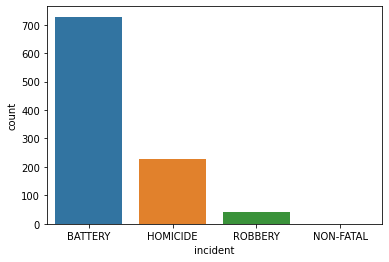

In [20]:
sns.countplot(x="incident",data=data)

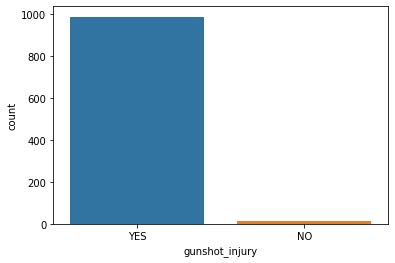

In [21]:
sns.countplot(x="gunshot_injury",data=data)

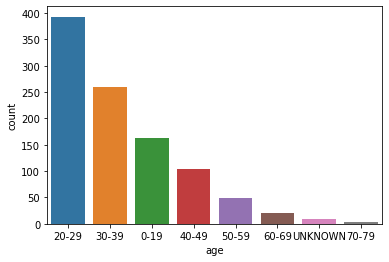

In [22]:
sns.countplot(x="age",data=data, order=data['age'].value_counts().index)

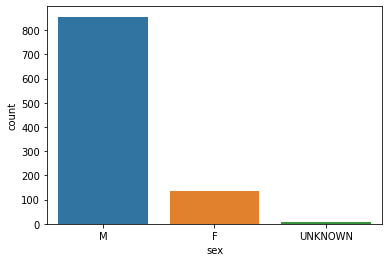

In [23]:
sns.countplot(x="sex",data=data)

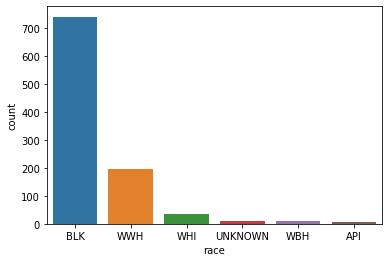

In [24]:
sns.countplot(x="race",data=data, order=data['race'].value_counts().index)

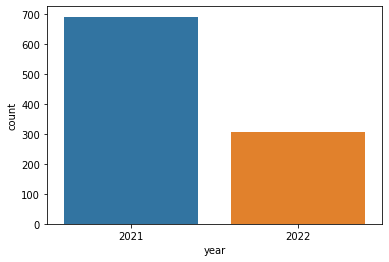

In [25]:
sns.countplot(x="year",data=data, order=data['year'].value_counts().index)

In [26]:
location_description_counts = data.location_description.value_counts()

location_description_counts

STREET                                    488
SIDEWALK                                  199
ALLEY                                      59
APARTMENT                                  47
GAS STATION                                38
VEHICLE NON-COMMERCIAL                     18
RESIDENCE                                  18
PARKING LOT / GARAGE (NON RESIDENTIAL)     14
AUTO                                       14
RESIDENCE - PORCH / HALLWAY                12
HOUSE                                       9
PARKING LOT                                 8
OTHER (SPECIFY)                             6
BAR OR TAVERN                               5
CLUB                                        5
PORCH                                       4
VACANT LOT / LAND                           4
BARBER SHOP/BEAUTY SALON                    3
HOSPITAL BUILDING / GROUNDS                 3
YARD                                        3
RESIDENCE - YARD (FRONT / BACK)             3
CTA BUS STOP                      

In [27]:
other_location_description = list(location_description_counts[location_description_counts <= 9].index)

other_location_description

['HOUSE',
 'PARKING LOT',
 'OTHER (SPECIFY)',
 'BAR OR TAVERN',
 'CLUB',
 'PORCH',
 'VACANT LOT / LAND',
 'BARBER SHOP/BEAUTY SALON',
 'HOSPITAL BUILDING / GROUNDS',
 'YARD',
 'RESIDENCE - YARD (FRONT / BACK)',
 'CTA BUS STOP',
 'RETAIL STORE',
 'COMMERCIAL / BUSINESS OFFICE',
 'VACANT LOT',
 'GROCERY FOOD STORE',
 'GOVERNMENT BUILDING / PROPERTY',
 'CONVENIENCE STORE',
 'PARK PROPERTY',
 'RAILROAD PROPERTY',
 'GANGWAY',
 'DRIVEWAY - RESIDENTIAL',
 'GARAGE',
 'CHA PARKING LOT / GROUNDS',
 'MEDICAL / DENTAL OFFICE',
 'SCHOOL - PUBLIC GROUNDS',
 'CTA BUS',
 'LIQUOR STORE',
 'CTA PLATFORM',
 'MOVIE HOUSE / THEATER',
 'HALLWAY',
 'BOWLING ALLEY',
 'DRIVEWAY',
 'RESTAURANT',
 'RESIDENCE - GARAGE',
 'HOTEL / MOTEL',
 'CTA TRAIN',
 'CHA APARTMENT']

In [28]:
data['location_description'] = data['location_description'].replace(other_location_description, 'OTHER')

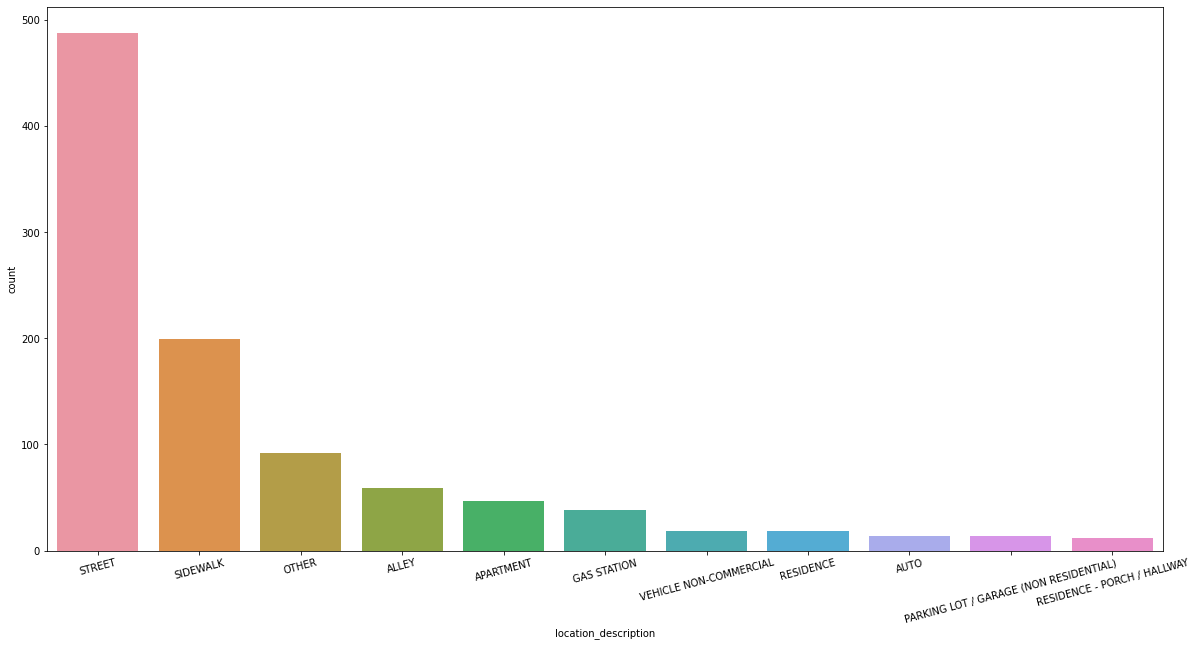

In [29]:
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(rotation=15)
sns.countplot(x="location_description", data=data, order=data['location_description'].value_counts().index)

In [30]:
data.insert(len(data.columns)-1, 'sex', data.pop('sex'))

In [31]:
data.drop(data.loc[data['sex'] == 'UNKNOWN'].index, inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])

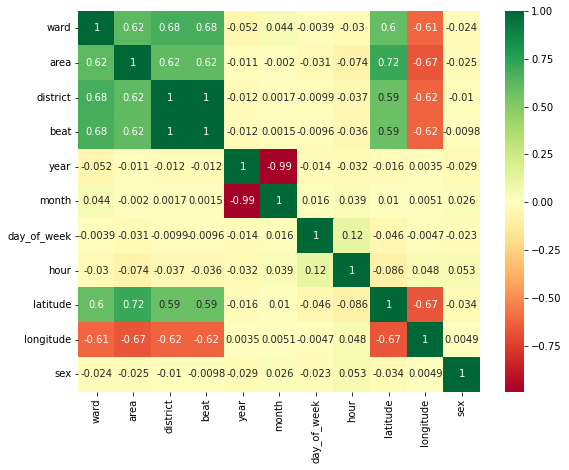

In [33]:
plt.figure(figsize = (9,7))

sns.heatmap(data[data.columns[1:]].corr(), annot=True, cmap='RdYlGn')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9fa06e090>,
      dtype=object)

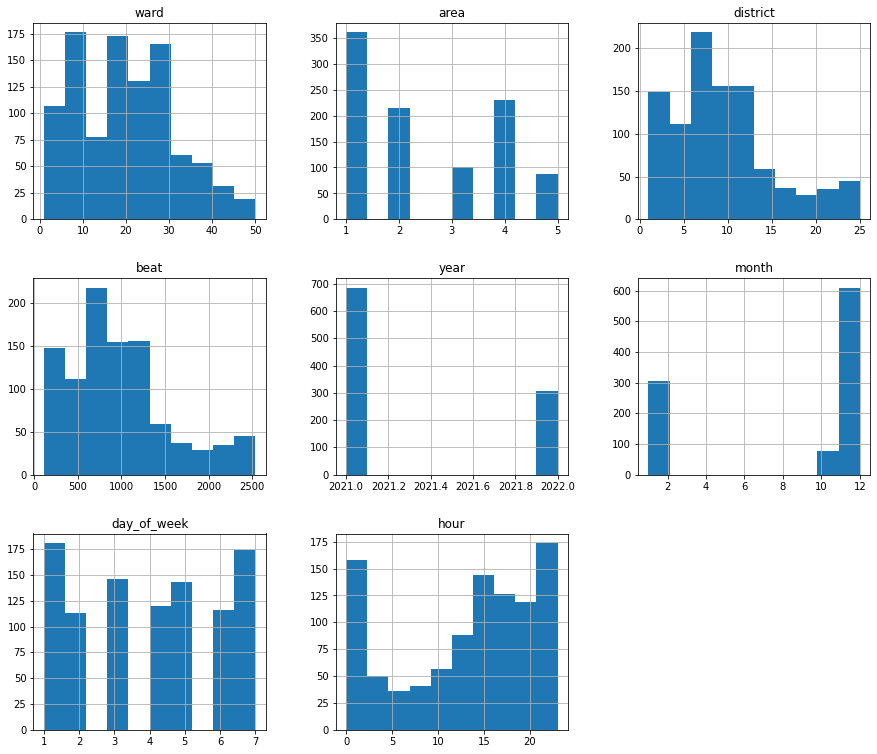

In [34]:
data.iloc[:, 0:13].hist(figsize=(15,13))

In [35]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [36]:
print(X)

[['BATTERY' 'YES' 2.0 ... 'OTHER' 41.9023605 -87.68354]
 ['BATTERY' 'YES' 18.0 ... 'STREET' 41.747581654 -87.709364654]
 ['BATTERY' 'YES' 28.0 ... 'STREET' 41.873868346 -87.696454654]
 ...
 ['ROBBERY' 'YES' 20.0 ... 'OTHER' 41.786889669 -87.617398547]
 ['BATTERY' 'YES' 50.0 ... 'STREET' 41.999699669 -87.704288547]
 ['BATTERY' 'YES' 20.0 ... 'STREET' 41.791458346 -87.621345346]]


In [37]:
c = 0
for r in X[0]:
    print(c, type(r))
    c += 1

0 <class 'str'>
1 <class 'str'>
2 <class 'float'>
3 <class 'float'>
4 <class 'float'>
5 <class 'float'>
6 <class 'str'>
7 <class 'str'>
8 <class 'int'>
9 <class 'int'>
10 <class 'int'>
11 <class 'int'>
12 <class 'str'>
13 <class 'float'>
14 <class 'float'>


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 6, 7, 12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [39]:
print(X)

[[1.0 0.0 0.0 ... 18 41.9023605 -87.68354]
 [1.0 0.0 0.0 ... 16 41.747581654 -87.709364654]
 [1.0 0.0 0.0 ... 15 41.873868346 -87.696454654]
 ...
 [0.0 0.0 0.0 ... 5 41.786889669 -87.617398547]
 [1.0 0.0 0.0 ... 4 41.999699669 -87.704288547]
 [1.0 0.0 0.0 ... 3 41.791458346 -87.621345346]]


In [40]:
print(y)

[1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
import tensorflow as tf

In [44]:
ann = tf.keras.models.Sequential()

In [45]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [46]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [47]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [48]:
ann.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
22/22 [==============================] - 2s 4ms/step - loss: 0.6227 - accuracy: 0.7971
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5885 - accuracy: 0.8388
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5550 - accuracy: 0.8547
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5246 - accuracy: 0.8604
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.8604
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss: 0.4749 - accuracy: 0.8590
Epoch 7/100
22/22 [==============================] - 0s 9ms/step - loss: 0.4566 - accuracy: 0.8590
Epoch 8/100
22/22 [==============================] - 0s 11ms/step - loss: 0.4424 - accuracy: 0.8590
Epoch 9/100
22/22 [==============================] - 0s 10ms/step - loss: 0.4309 - accuracy: 0.8590
Epoch 10/100
22/22 [==============================] - 0s 12ms/step - loss: 0.4215 - accuracy: 0.8590
Epoch 

In [50]:
X[22]

array([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 1.0, 3.0, 322.0, 2022, 2, 4, 19,
       41.765226904, -87.620679059], dtype=object)

In [51]:
y[22]

0

In [52]:
print(ann.predict(sc.transform([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 1.0, 3.0, 322.0, 2022, 2, 4, 19,
       41.765226904, -87.620679059]])) > 0.5)

[[False]]


In [53]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0  39]
 [  6 253]]


0.8489932885906041